In [1]:
# only for colab:
%pip install numpy pandas seaborn matplotlib ipywidgets #scikit-learn==1.1.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
SKLEARN_OLD = False
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import neighbors, datasets
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from IPython.display import HTML, clear_output
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
try:
    from sklearn.inspection import DecisionBoundaryDisplay
except ImportError:
    SKLEARN_OLD = True
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import iris dataset
iris = datasets.load_iris()
diabetes = datasets.load_diabetes()

# Machine Learning - Intro

## Traditional Computer Science
<img src="./data/LIS641_guest_lecture_slide1.png" alt="slide1" width="50%"/>
<!-- ![image](./data/LIS641_guest_lecture_slide1.png) -->

## Machine Learning
<img src="./data/LIS641_guest_lecture_slide2.png" alt="slide2" width="50%"/>
<!-- ![image](./data/LIS641_guest_lecture_slide2.png) -->

### For example - medical imaging
<img src="./data/individual_dxa.png" alt="dxa_individual" width="20%"/> 

<img src="./data/LIS641_guest_lecture_slide2.png" alt="slide2" width="50%"/>

<img src="./data/LIS641_guest_lecture_slide3.png" alt="slide2" width="80%"/>

# Machine learning vs AI
<img width="40%" style="float: right;" src="./data/aiml_venn.png" />

* AI -> top-down: 
    * Emulating human behavior is the goal
    * Branches into conginitive science, (mathematical) logic, etc.
* ML -> bottom-up: 
    * Practically oriented
    * Solving a specific task is the goal
    * Mostly based on statistics and optimization

# Classic supervised learning
## Classification
<img src="./data/classification.png" alt="slide1" width="70%"/>

#### Iris dataset
<img src="./data/iris_sample_image.png" alt="slide1" width="70%"/>

## Classification - K-nearest neighbors

In [3]:
'''
Code from: 
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
'''

def knn_plotter(n_neighbors=1, weights='uniform'):
    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset
    input_data = iris.data[:, :2]
    output_labels = iris.target

    # Create color maps
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ["darkorange", "c", "darkblue"]

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(input_data, output_labels)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        input_data,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=input_data[:, 0],
        y=input_data[:, 1],
        hue=iris.target_names[output_labels],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

    plt.show()

```python
def knn_plotter(n_neighbors=1, weights='uniform'):
    # ...
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    # ...
```

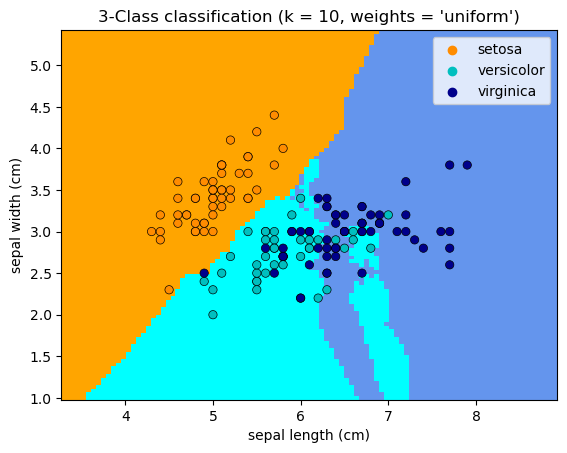

In [4]:
knn_plotter(n_neighbors=10, weights='uniform')

In [5]:
interact(knn_plotter, n_neighbors=(1,50), weights=fixed('uniform'));

interactive(children=(IntSlider(value=1, description='n_neighbors', max=50, min=1), Output()), _dom_classes=('…

## Classification - logistic regression

* Linear classification
* Add the sigmoid function to get probabilities
$ f(x) = \frac{\mathrm{1} }{\mathrm{1} + e^-x }$

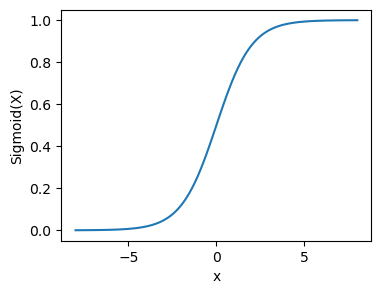

In [6]:
import numpy as np
import math
  
x = np.linspace(-8, 8, 100)
z = 1/(1 + np.exp(-x))

plt.figure(figsize=(4,3))
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [7]:
'''
Code from: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py
'''

def logistic_regression_plotter():
    X = iris.data[:, :2]  # we only take the first two features for visualization
    y = iris.target

    n_features = X.shape[1]

    n_classifiers = 1

    plt.figure(figsize=(3 * 2, n_classifiers * 2))
    plt.subplots_adjust(bottom=0.2, top=0.95)

    xx = np.linspace(3, 9, 100)
    yy = np.linspace(1, 5, 100).T
    xx, yy = np.meshgrid(xx, yy)
    Xfull = np.c_[xx.ravel(), yy.ravel()]
        
    classifier = LogisticRegression()
    classifier.fit(X, y)

    y_pred = classifier.predict(X)

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, k + 1)
        plt.title("Class %d" % k)
        imshow_handle = plt.imshow(
            probas[:, k].reshape((100, 100)), extent=(3, 9, 1, 5), origin="lower"
        )
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(iris.feature_names[0])
        if k == 0:
            plt.ylabel(iris.feature_names[1])

        idx = y_pred == k
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker="o", c="w", edgecolor="k")

    ax = plt.axes([0.15, 0.04, 0.7, 0.05])
    plt.title("Probability")
    plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

    plt.show()

```python
def logistic_regression_plotter():
    # ...
    
    classifier = LogisticRegression()
    classifier.fit(X, y)
    
    # ...
```

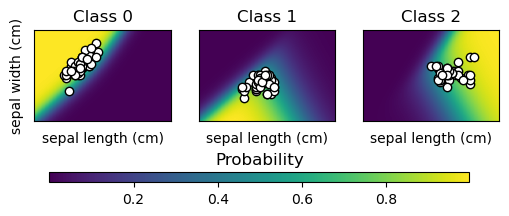

In [8]:
logistic_regression_plotter()

# Classic supervised learning
## Regression
* Target is a continuous number

<table><tr>
<td> <img src="./data/regression_1.png" alt="Drawing" width="45%"/> </td>
</tr></table>

<table><tr>
<td> <img src="./data/regression_1.png" alt="Drawing" width="90%"/> </td>
<td> <img src="./data/regression_2.png" alt="Drawing" width="90%"/> </td>
</tr></table>

<table><tr>
<td> <img src="./data/regression_4.png" alt="Drawing" width="90%"/> </td>
<td> <img src="./data/regression_5.png" alt="Drawing" width="90%"/> </td>
</tr></table>

<table><tr>
<td> <img src="./data/regression_3.png" alt="Drawing" width="45%"/> </td>
</tr></table>

In [9]:
'''
Code from:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
'''

def linear_regression_animator(static=True):
    diabetes_X = diabetes.data
    diabetes_X = diabetes_X[:,2:3]
    diabetes_y = diabetes.target

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes_y[:-20]
    diabetes_y_test = diabetes_y[-20:]

    # Create linear regression object
    # Create linear regression object
    # regr = linear_model.LinearRegression()
    regr = SGDRegressor(max_iter=10_000)

    # Train the model using the training sets
    regr.partial_fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)
    
    fig, ax = plt.subplots()
    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
    l, = plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
    
    
    def animate(i):
        for _ in range(200):
            regr.partial_fit(diabetes_X_train, diabetes_y_train)
        diabetes_y_pred = regr.predict(diabetes_X_test)
        l.set_data(diabetes_X_test, diabetes_y_pred)
    
    plt.xlabel(f'{diabetes.feature_names[2].upper()} (normalized)')
    plt.ylabel('Disease Progression')
    
    if static:
        regr.fit(diabetes_X_train, diabetes_y_train)
        diabetes_y_pred = regr.predict(diabetes_X_test)
        l.set_data(diabetes_X_test, diabetes_y_pred)
    
    else:
        ani = animation.FuncAnimation(fig, animate, frames=50)
        return ani
    
    plt.show()

```python
def linear_regression_animator():
    # ...
    
    ## alternatively, the non-iterative model: 
    # regr = linear_model.LinearRegression()
    regr = SGDRegressor(max_iter=10_000)
    regr.fit(diabetes_X_train, diabetes_y_train)
    
    # ...
```

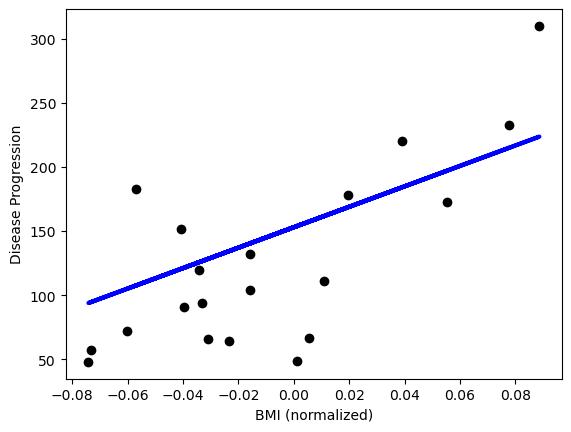

In [10]:
linear_regression_animator()

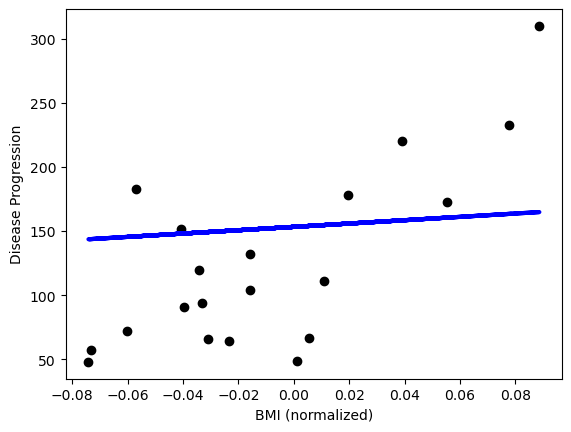

In [11]:
ani = linear_regression_animator(static=False)

In [12]:
HTML(ani.to_jshtml())

### To fit the model, you have to define a training objective

<img width="50%" style="float: right;" src="./data/regression_6.png" />

#### Mean absolute error:
### $ \frac{\sum_{i=1}^{N}|Y_i-\hat{Y}_i|}{N} $
### $ \frac{\sum_{i=1}^{N}|Y_i-(mx_i+b)|}{N} $

## Model validation

In [13]:
''' 
Code from:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
'''

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


def fit_plotter():
    np.random.seed(0)

    n_samples = 30
    degrees = [1, 4, 15]

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1

    plt.figure(figsize=(14, 5))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(
            pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
        )

        X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title(
            "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
                degrees[i], -scores.mean(), scores.std()
            )
        )
    plt.show()

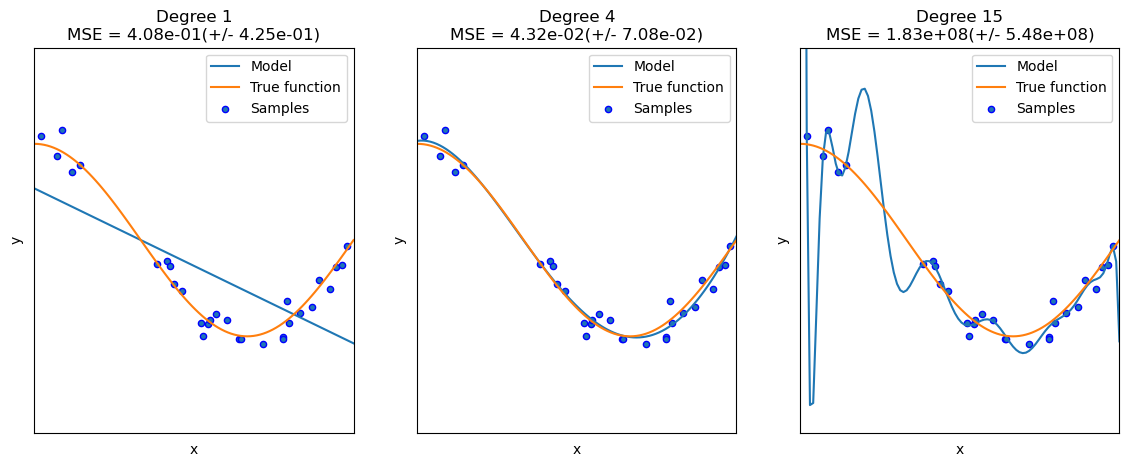

In [14]:
fit_plotter()

<img width="80%" style="float: center;" src="./data/cross_val.png" />

# Classic unsupervised learning
## Clustering - K-means

* Randomly assign k centroids
* Repeat until convergence or stopping criterium:
    * Assign every point to its closest centroid
    * Compute mean over all points for each centroid
    * Move centroid to cluster mean

<table><tr>
<td> <img src="./data/k_means.gif" alt="Drawing" width="45%"/> </td>
</tr></table>

In [15]:
'''
Code from:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
'''

def k_means_limitations():
    plt.figure(figsize=(8, 8))

    n_samples = 1500
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)

    # Incorrect number of clusters
    y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

    plt.subplot(221)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Incorrect Number of Blobs")

    # Anisotropicly distributed data
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X_aniso = np.dot(X, transformation)
    y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

    plt.subplot(222)
    plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
    plt.title("Anisotropicly Distributed Blobs")

    # Different variance
    X_varied, y_varied = make_blobs(
        n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
    )
    y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

    plt.subplot(223)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
    plt.title("Unequal Variance")

    # Unevenly sized blobs
    X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
    y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

    plt.subplot(224)
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
    plt.title("Unevenly Sized Blobs")

    plt.show()

```python
def k_means_limitations():
    # ...
    y_pred = KMeans(n_clusters=k).fit_predict(X)
    # ...
```

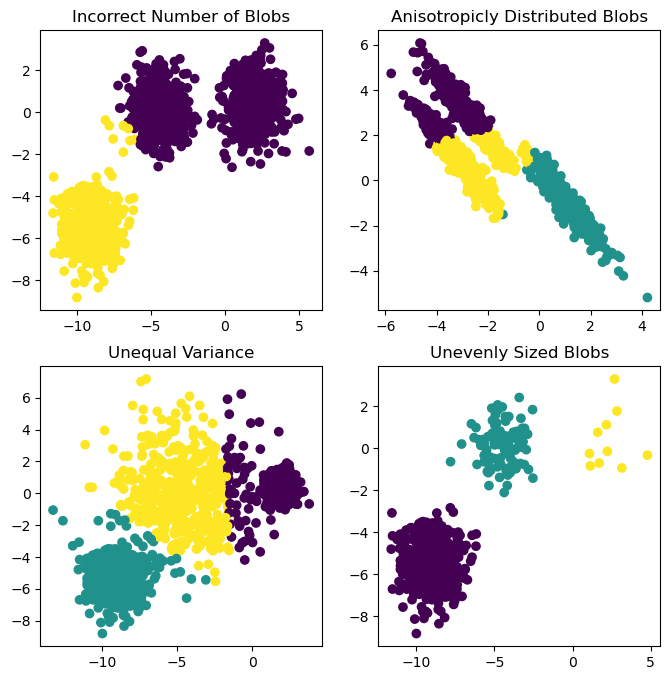

In [16]:
k_means_limitations()

## Dimensionality reduction - Principal Component Analysis

In [17]:
'''
Code from:
https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
'''

def pca_plotter():
    rng = np.random.RandomState(0)
    n_samples = 500
    cov = [[3, 3], [3, 4]]
    X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
    pca = PCA(n_components=2).fit(X)


    plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples", color='grey')
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp = comp * var  # scale component by its variance explanation power
        plt.plot(
            [0, comp[0]],
            [0, comp[1]],
            label=f"Component {i}",
            linewidth=3,
            color=f"C{i}",
        )
    plt.gca().set(
        aspect="equal",
        title="2-dimensional dataset with principal components",
        xlabel="first feature",
        ylabel="second feature",
    )
    plt.legend()
    plt.show()

```python
def pca_plotter():
    # ...
    pca = PCA(n_components=2).fit(X)
    # to get components:
    pca.components_
    # to get the explained variace per component
    pca.explained_variance_
    # to map data into principal component space
    mapped_X = pca.transform(X)
    # ...
```

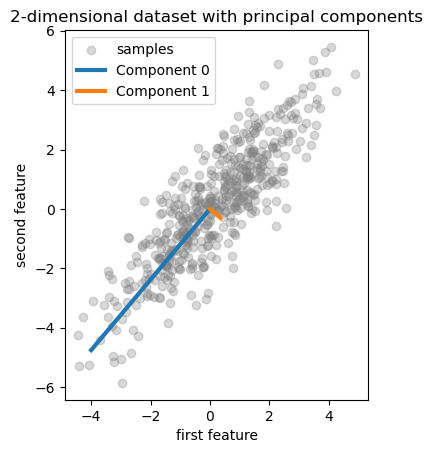

In [18]:
pca_plotter()

<Figure size 640x480 with 0 Axes>

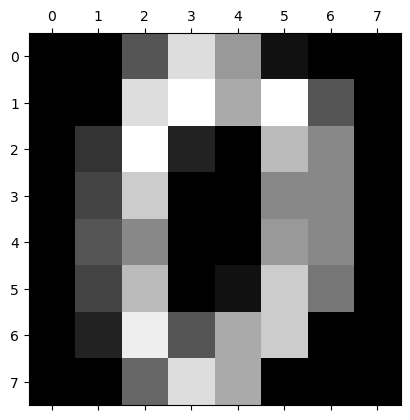

In [19]:
digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [20]:
'''
Code from:
https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py
'''

def pca_variance_plotter():
    # Define a pipeline to search for the best combination of PCA truncation
    # and classifier regularization.
    pca = PCA()
    # Define a Standard Scaler to normalize inputs
    scaler = StandardScaler()

    # set the tolerance to a large value to make the example faster
    logistic = LogisticRegression(max_iter=10000, tol=0.1)
    pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

    X_digits, y_digits = datasets.load_digits(return_X_y=True)
    # Parameters of pipelines can be set using '__' separated parameter names:
    param_grid = {
        "pca__n_components": [5, 15, 30, 45, 60],
        "logistic__C": np.logspace(-4, 4, 4),
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_digits, y_digits)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

    # Plot the PCA spectrum
    pca.fit(X_digits)

    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
    ax0.plot(
        np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
    )
    ax0.set_ylabel("PCA explained variance ratio")

    ax0.axvline(
        search.best_estimator_.named_steps["pca"].n_components,
        linestyle=":",
        label="n_components chosen",
    )
    ax0.legend(prop=dict(size=12))

    # For each number of components, find the best classifier results
    results = pd.DataFrame(search.cv_results_)
    components_col = "param_pca__n_components"
    best_clfs = results.groupby(components_col).apply(
        lambda g: g.nlargest(1, "mean_test_score")
    )

    best_clfs.plot(
        x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
    )
    ax1.set_ylabel("Classification accuracy (val)")
    ax1.set_xlabel("n_components")

    plt.xlim(-1, 70)

    plt.tight_layout()
    plt.show()

Best parameter (CV score=0.924):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


/Users/yannikglaser/miniforge3/envs/ssl_demo/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


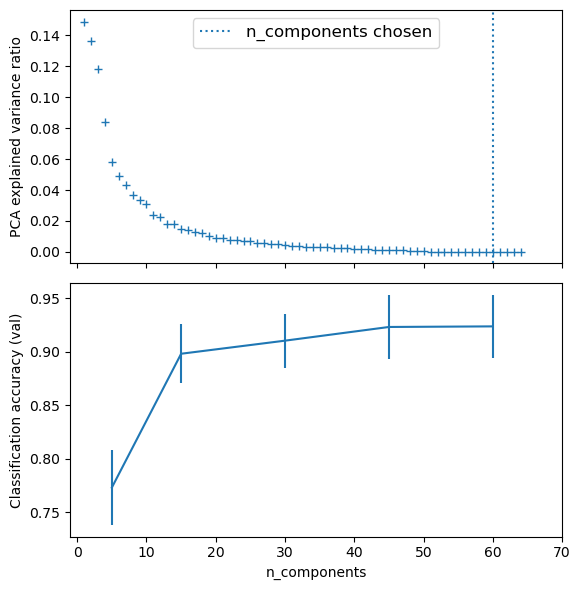

In [21]:
pca_variance_plotter()

# Scaling to nonlinear problems

In [22]:
'''
Code from:
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
'''
def cls_plotter():
    names = [
        "Nearest Neighbors",
        "Linear SVM",
        "RBF SVM",
        "Gaussian Process",
        "Decision Tree",
        "Random Forest",
        "Neural Net",
        "AdaBoost",
        "Naive Bayes",
        "QDA",
    ]

    classifiers = [
        neighbors.KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
    ]

    X, y = make_classification(
        n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
    )
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [
        make_moons(noise=0.3, random_state=0),
        make_circles(noise=0.2, factor=0.5, random_state=1),
        linearly_separable,
    ]

    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            DecisionBoundaryDisplay.from_estimator(
                clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )

            # Plot the training points
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
            )
            # Plot the testing points
            ax.scatter(
                X_test[:, 0],
                X_test[:, 1],
                c=y_test,
                cmap=cm_bright,
                edgecolors="k",
                alpha=0.6,
            )

            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1

    plt.tight_layout()
    plt.show()

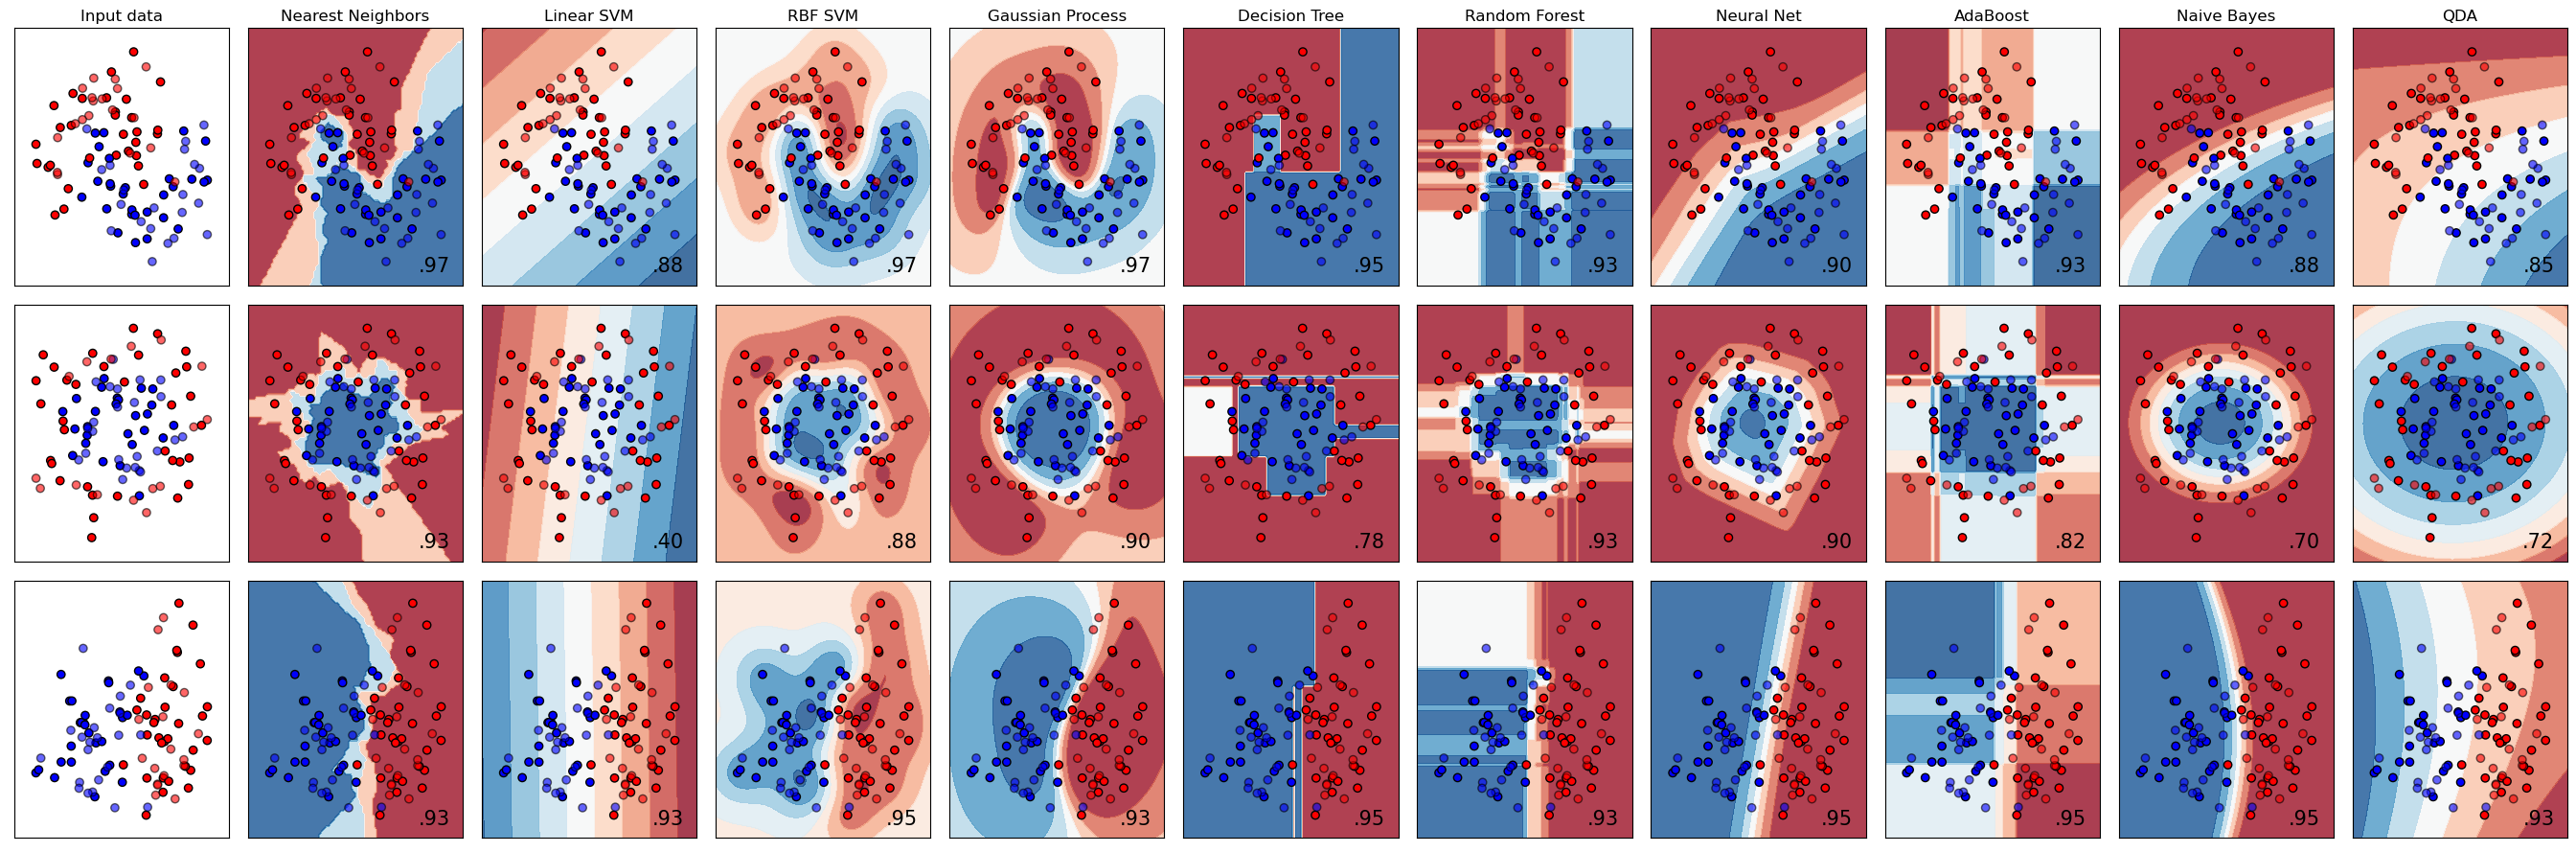

In [23]:
if not SKLEARN_OLD:
    cls_plotter()

### Tensorflow playground
https://playground.tensorflow.org/

### Stable diffusion (community-drive, open-source DALL-E)
https://huggingface.co/spaces/stabilityai/stable-diffusion
* Guides: https://github.com/Maks-s/sd-akashic